<a href="https://colab.research.google.com/github/htnahddis/Academics_Sem5/blob/main/ML_EXP4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

In [20]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

print("Shape before cleaning: ", df.shape)
print(df.head())

Shape before cleaning:  (891, 12)
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]



Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


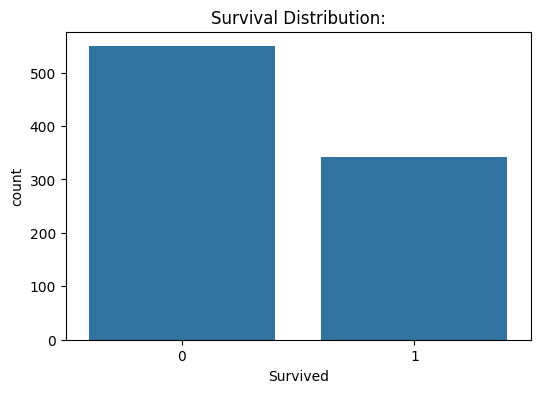

In [21]:
df.drop(columns=["Name","Ticket", "Cabin"], inplace=True, errors = 'ignore')

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())

plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survival Distribution:")
plt.show()

In [22]:
df = pd.get_dummies(df,columns=['Sex','Embarked'], drop_first=True)

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]


print(f"\n Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")


 Random Forest Accuracy: 0.8134328358208955
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.90      0.86       165
           1       0.80      0.68      0.74       103

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['Died', 'Survived'], ytickabels=['Died', 'Survived'])
plt.title("Confusion Matrix")
plt.show()

NameError: name 'confusion_matrix' is not defined

<Figure size 500x400 with 0 Axes>

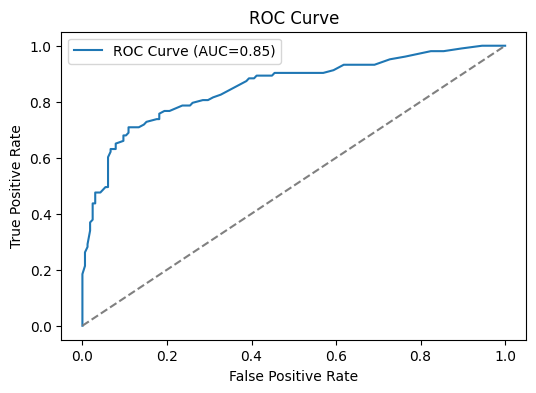

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, label= f"ROC Curve (AUC={roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0,1],[0,1], '--', color ='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()